In [1]:
from IPython.display import Image

# concepts:

- experiment : MLflow allows you to group runs under experiments, which can be useful for comparing runs intended to tackle a particular task.
- run


## start MLFlow UI

start up the MLFlow UI by:

> ninja$ mlflow ui
[2020-06-11 18:56:02 +0200] [7404] [INFO] Starting gunicorn 20.0.4
[2020-06-11 18:56:02 +0200] [7404] [INFO] Listening at: http://127.0.0.1:5000 (7404)
[2020-06-11 18:56:02 +0200] [7404] [INFO] Using worker: sync
[2020-06-11 18:56:02 +0200] [7408] [INFO] Booting worker with pid: 7408

this will start a web service hosted locally on port 5000, go ahead and check it out:

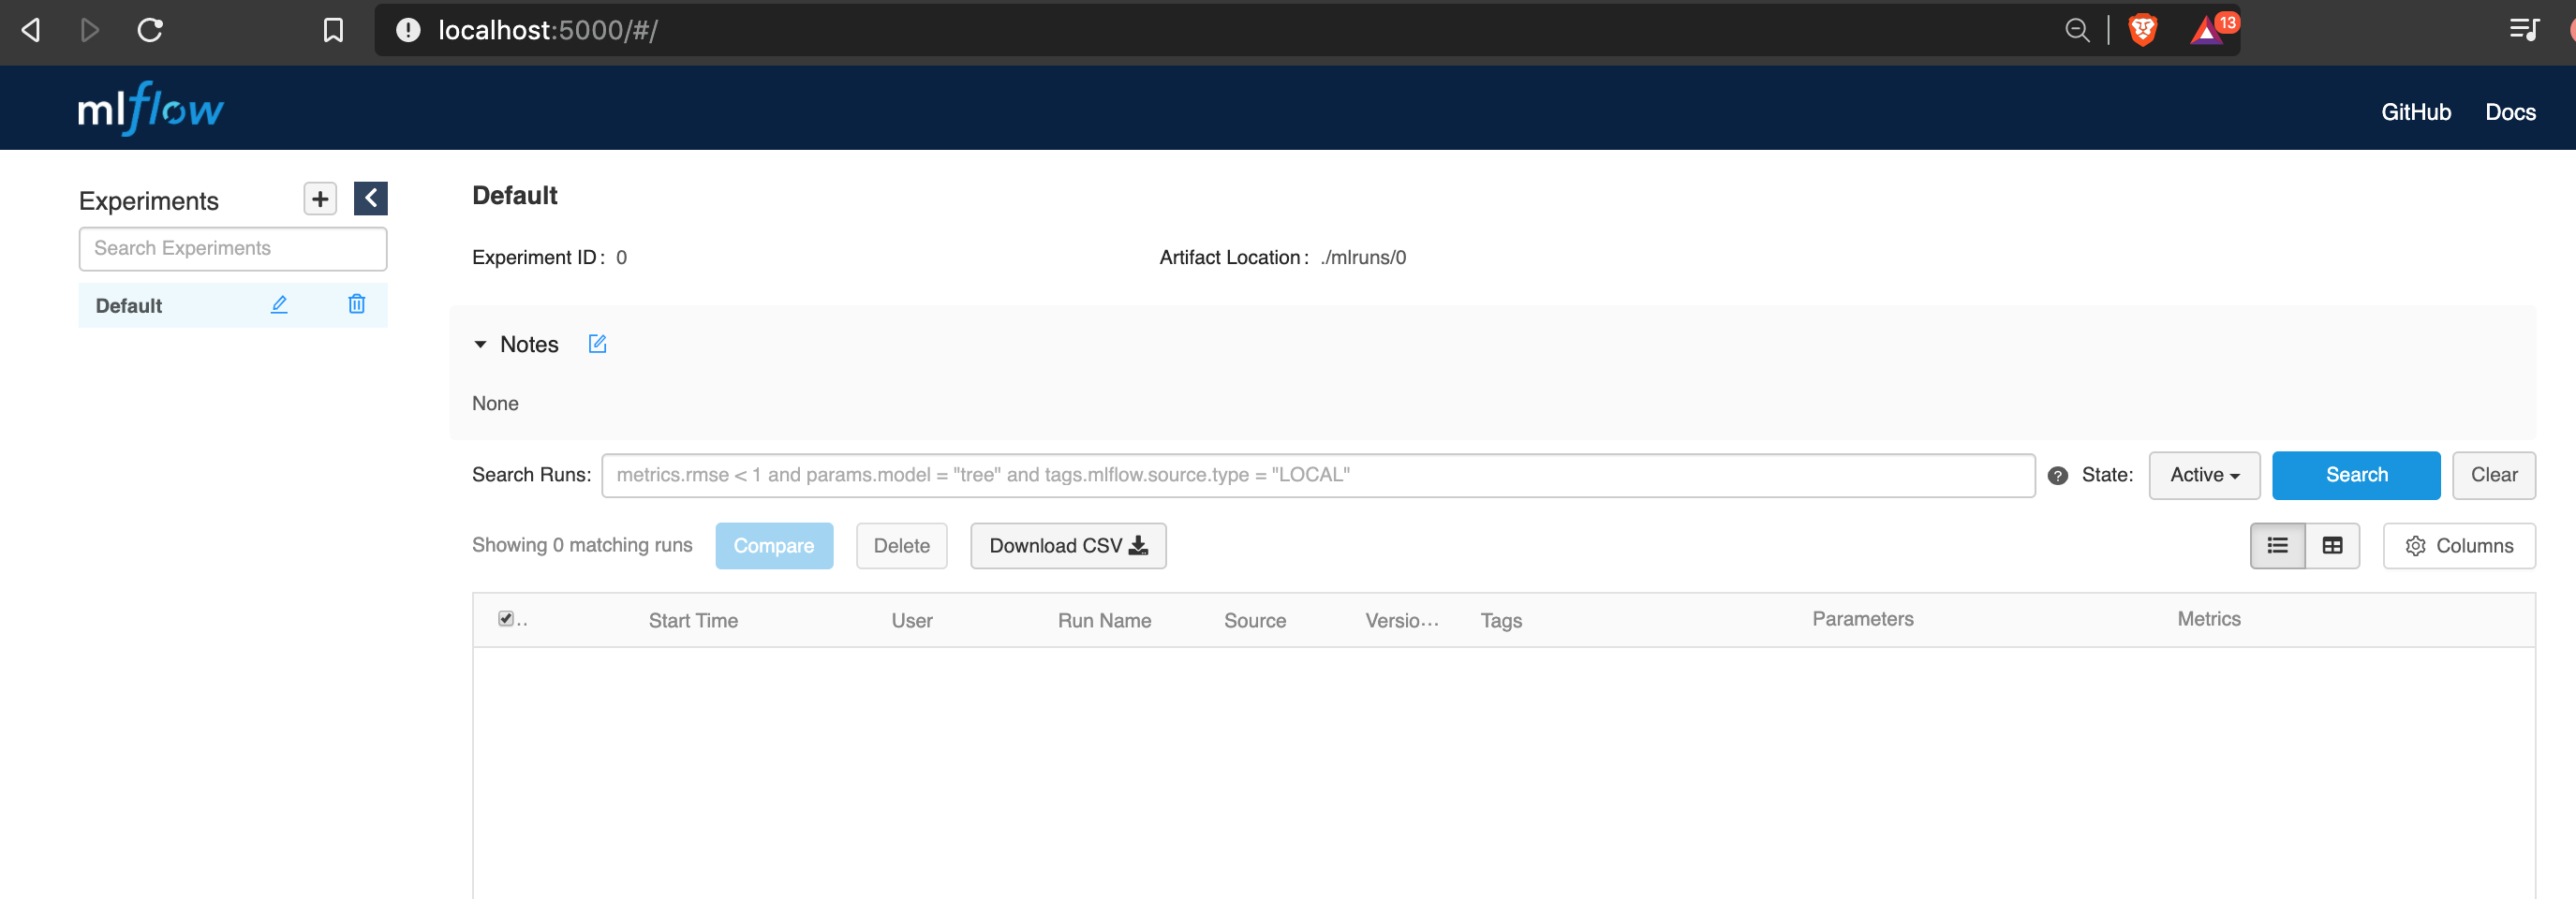

In [2]:
Image("default.png")

## create an experiment

create an experiment with name __my experiment !__, as it happens, it is assigned with id __3__

>ninja$ mlflow experiments create --experiment-name "my experiment !"

>Created experiment 'Diabetes progression predictions' with id 3

## check out the newly-created experiment in MLFlow UI

by .. refreshing the page.. and Voila!! we see a new experiment coming up!

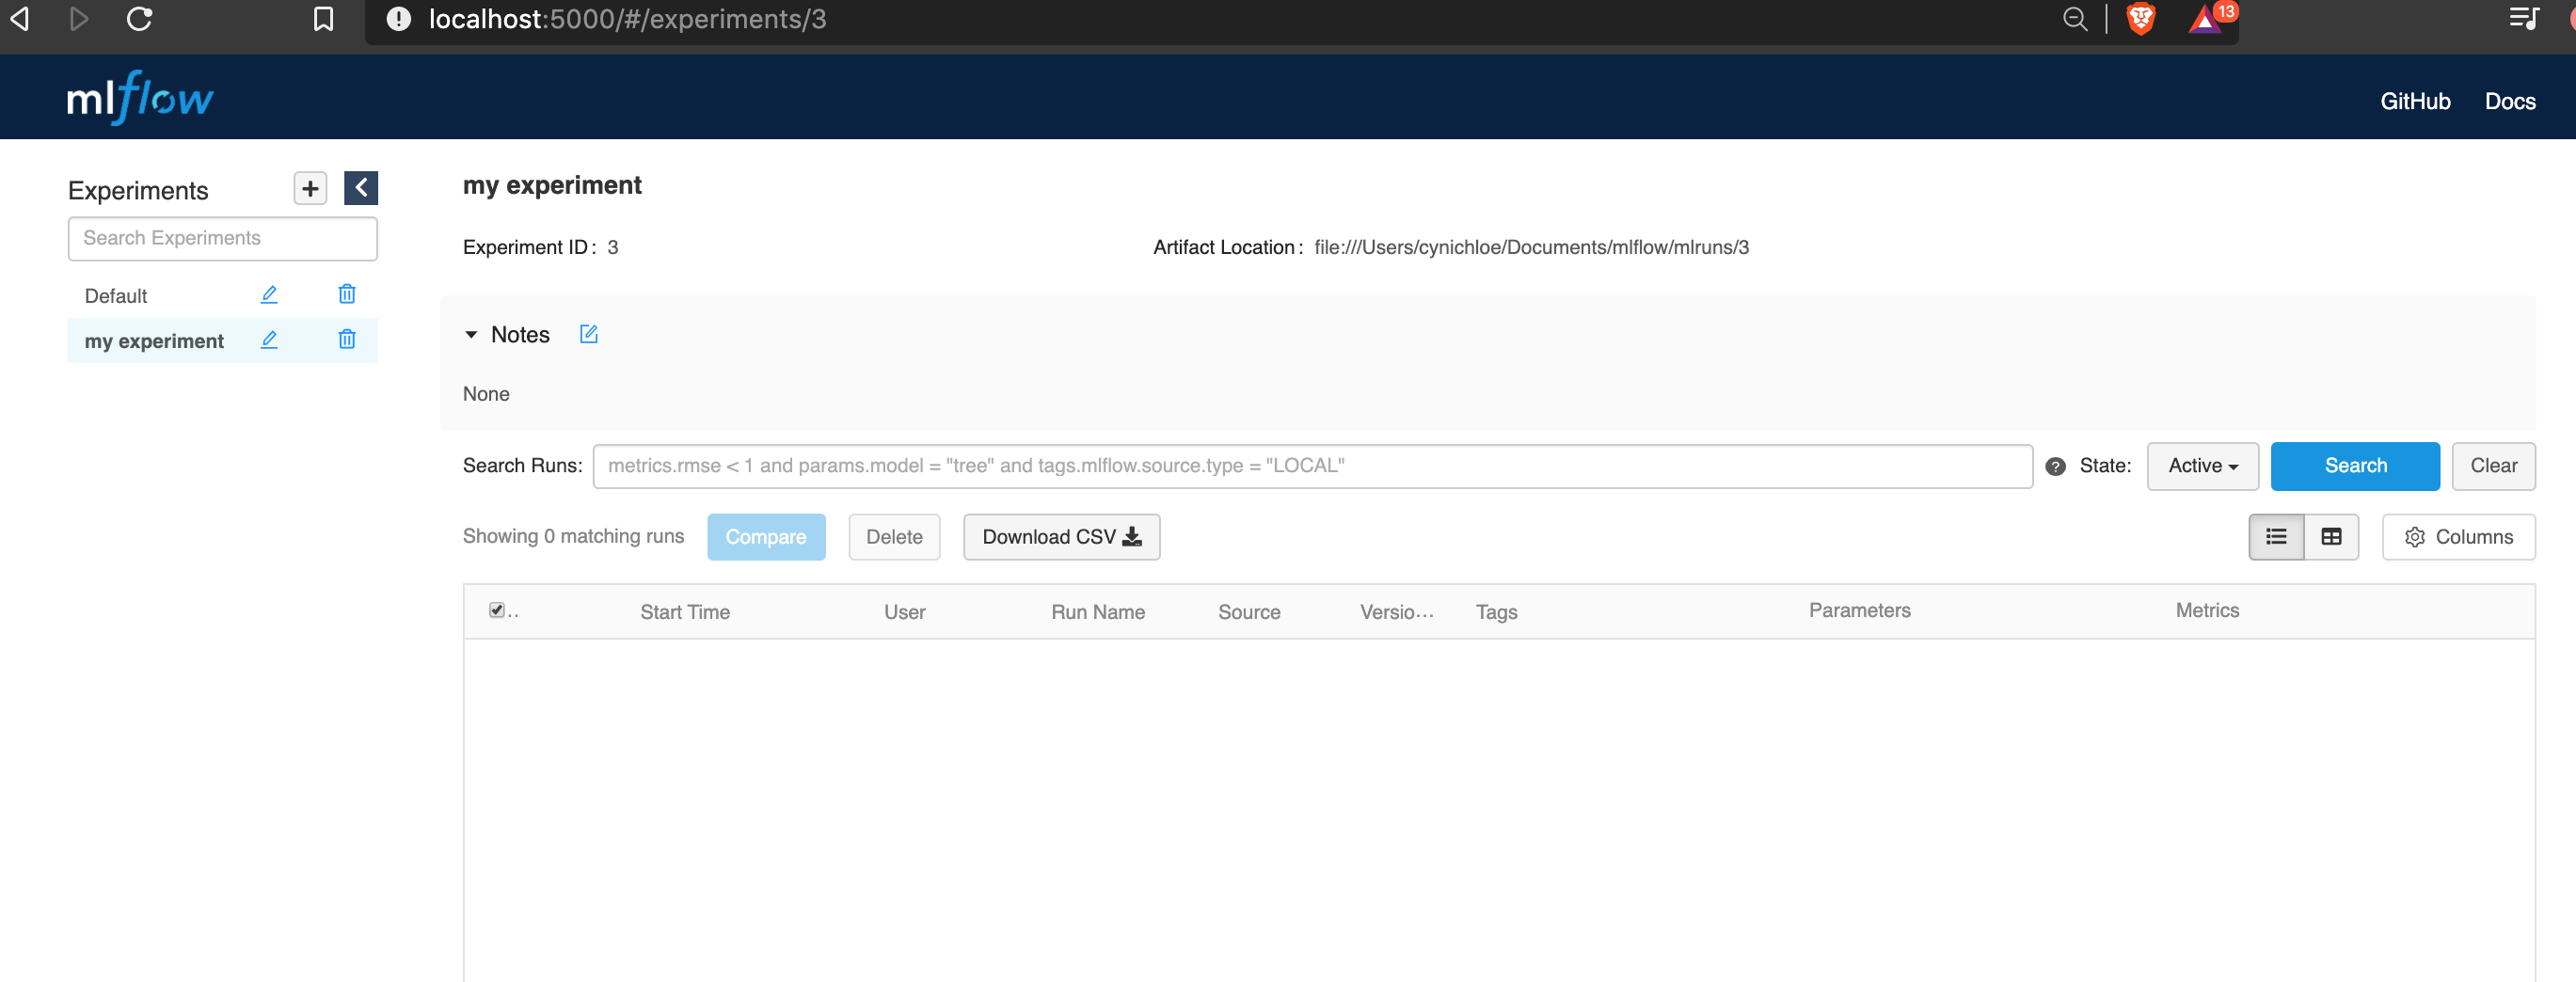

In [3]:
Image("id3.png")

## now creating a run

to do a run and link it with experiment 3:

> ninja$ MLFLOW_EXPERIMENT_ID=3 python3 mlflow/examples/sklearn_elasticnet_wine/train.py 1 2
> ninja$ MLFLOW_EXPERIMENT_ID=3 python3 mlflow/examples/sklearn_elasticnet_wine/train.py 10 20

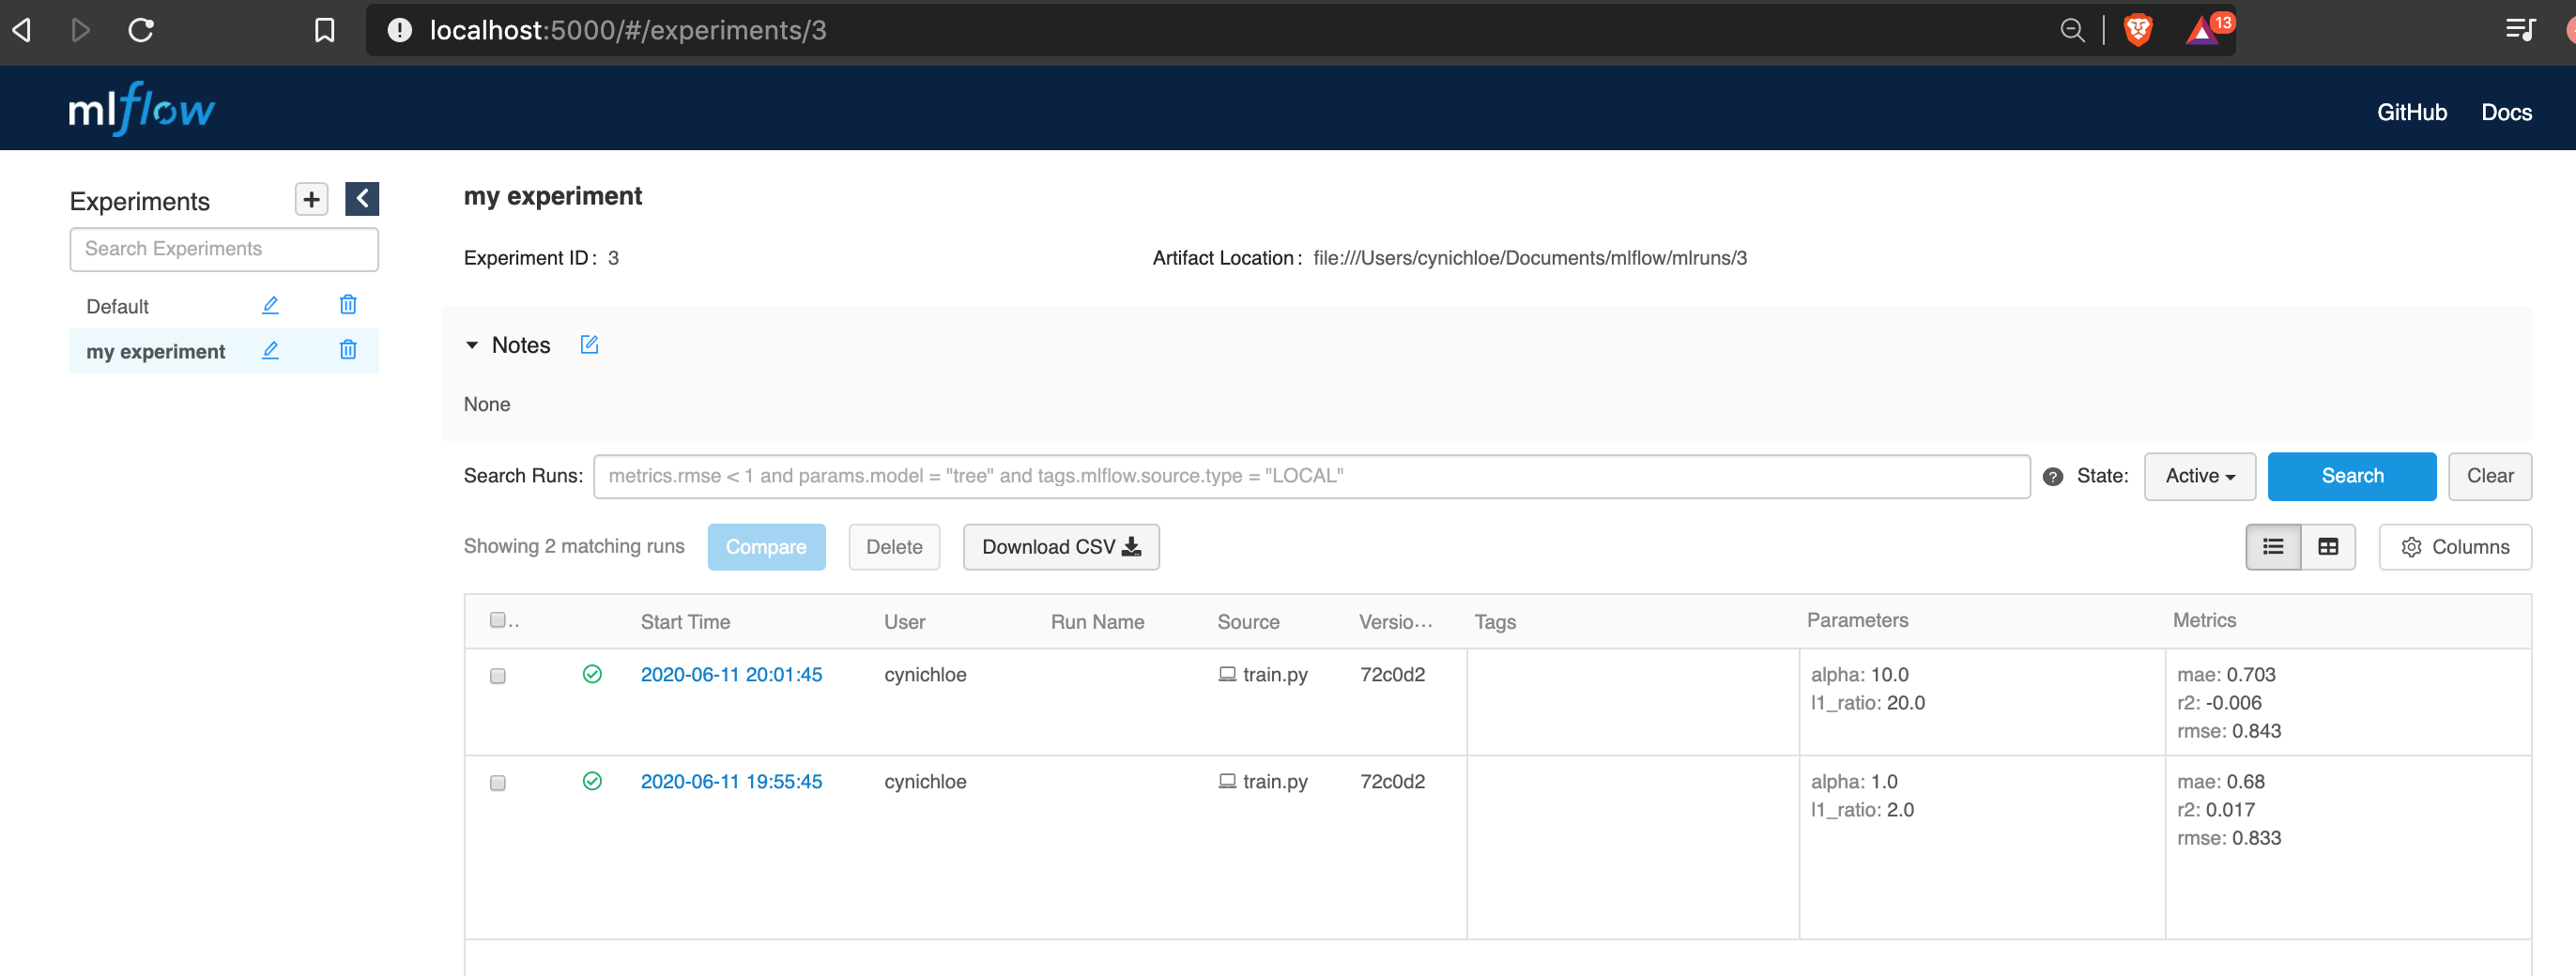

In [6]:
Image("runs_id3.png")

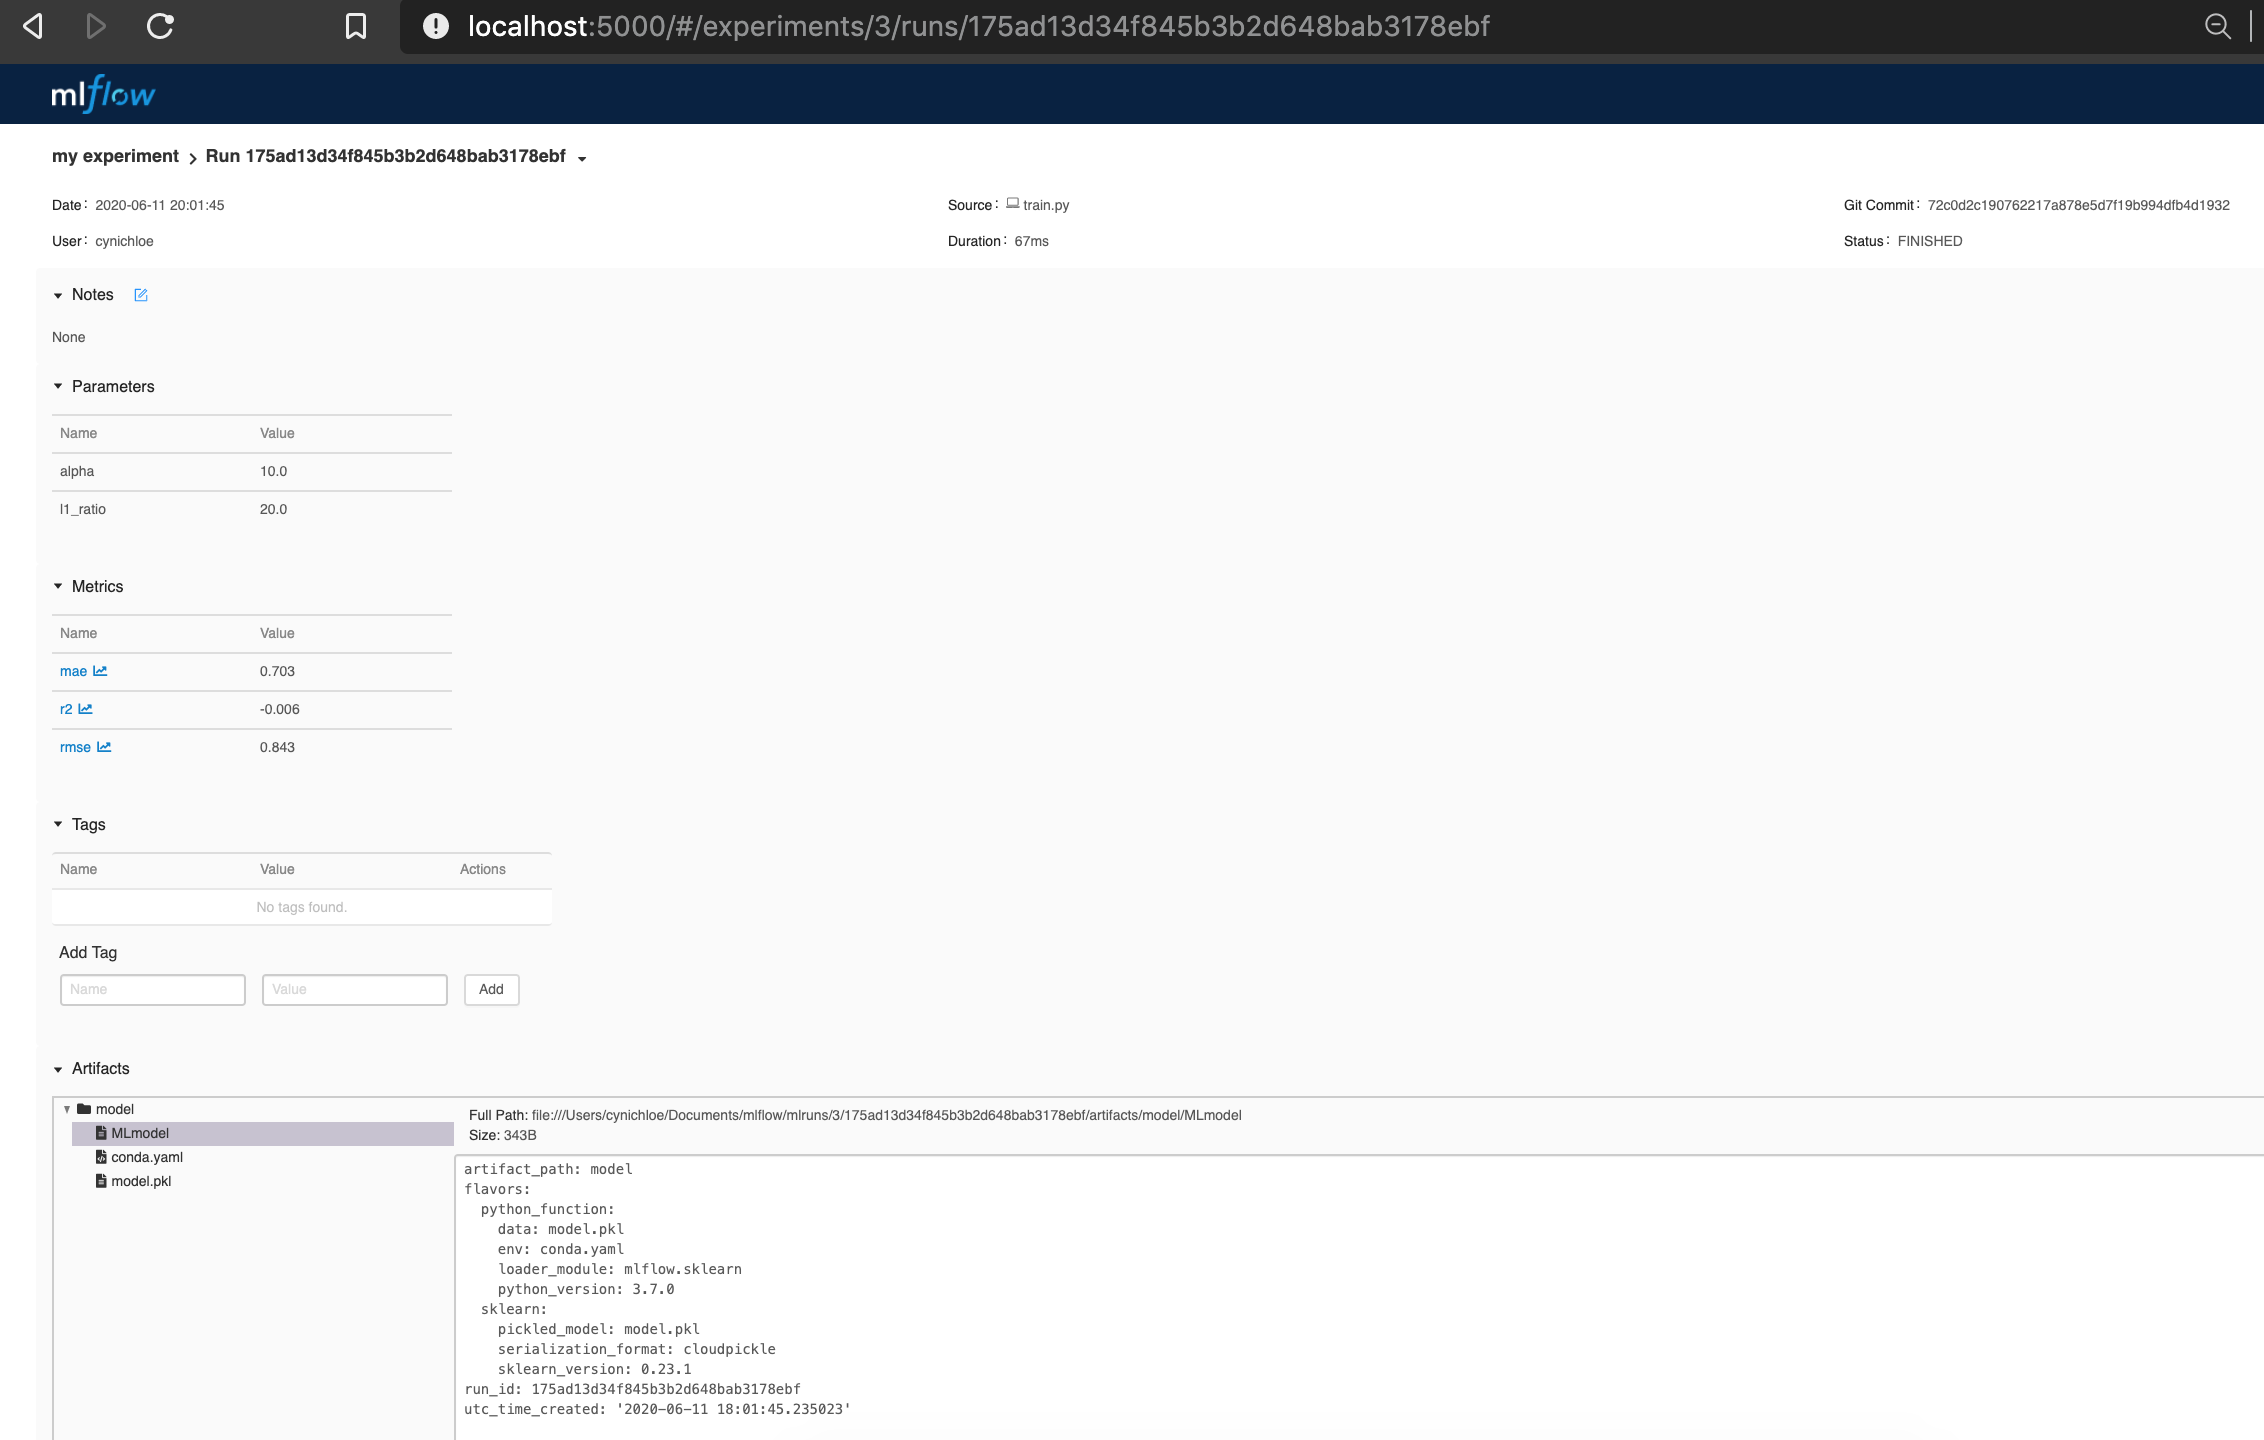

In [8]:
Image("run_model.png")

__Attention!__

if you don't specify __MLFLOW_EXPERIMENT_ID__, then it will always be registered as a run in default experiment.

> ninja$ python3 mlflow/examples/sklearn_elasticnet_wine/train.py 1 2

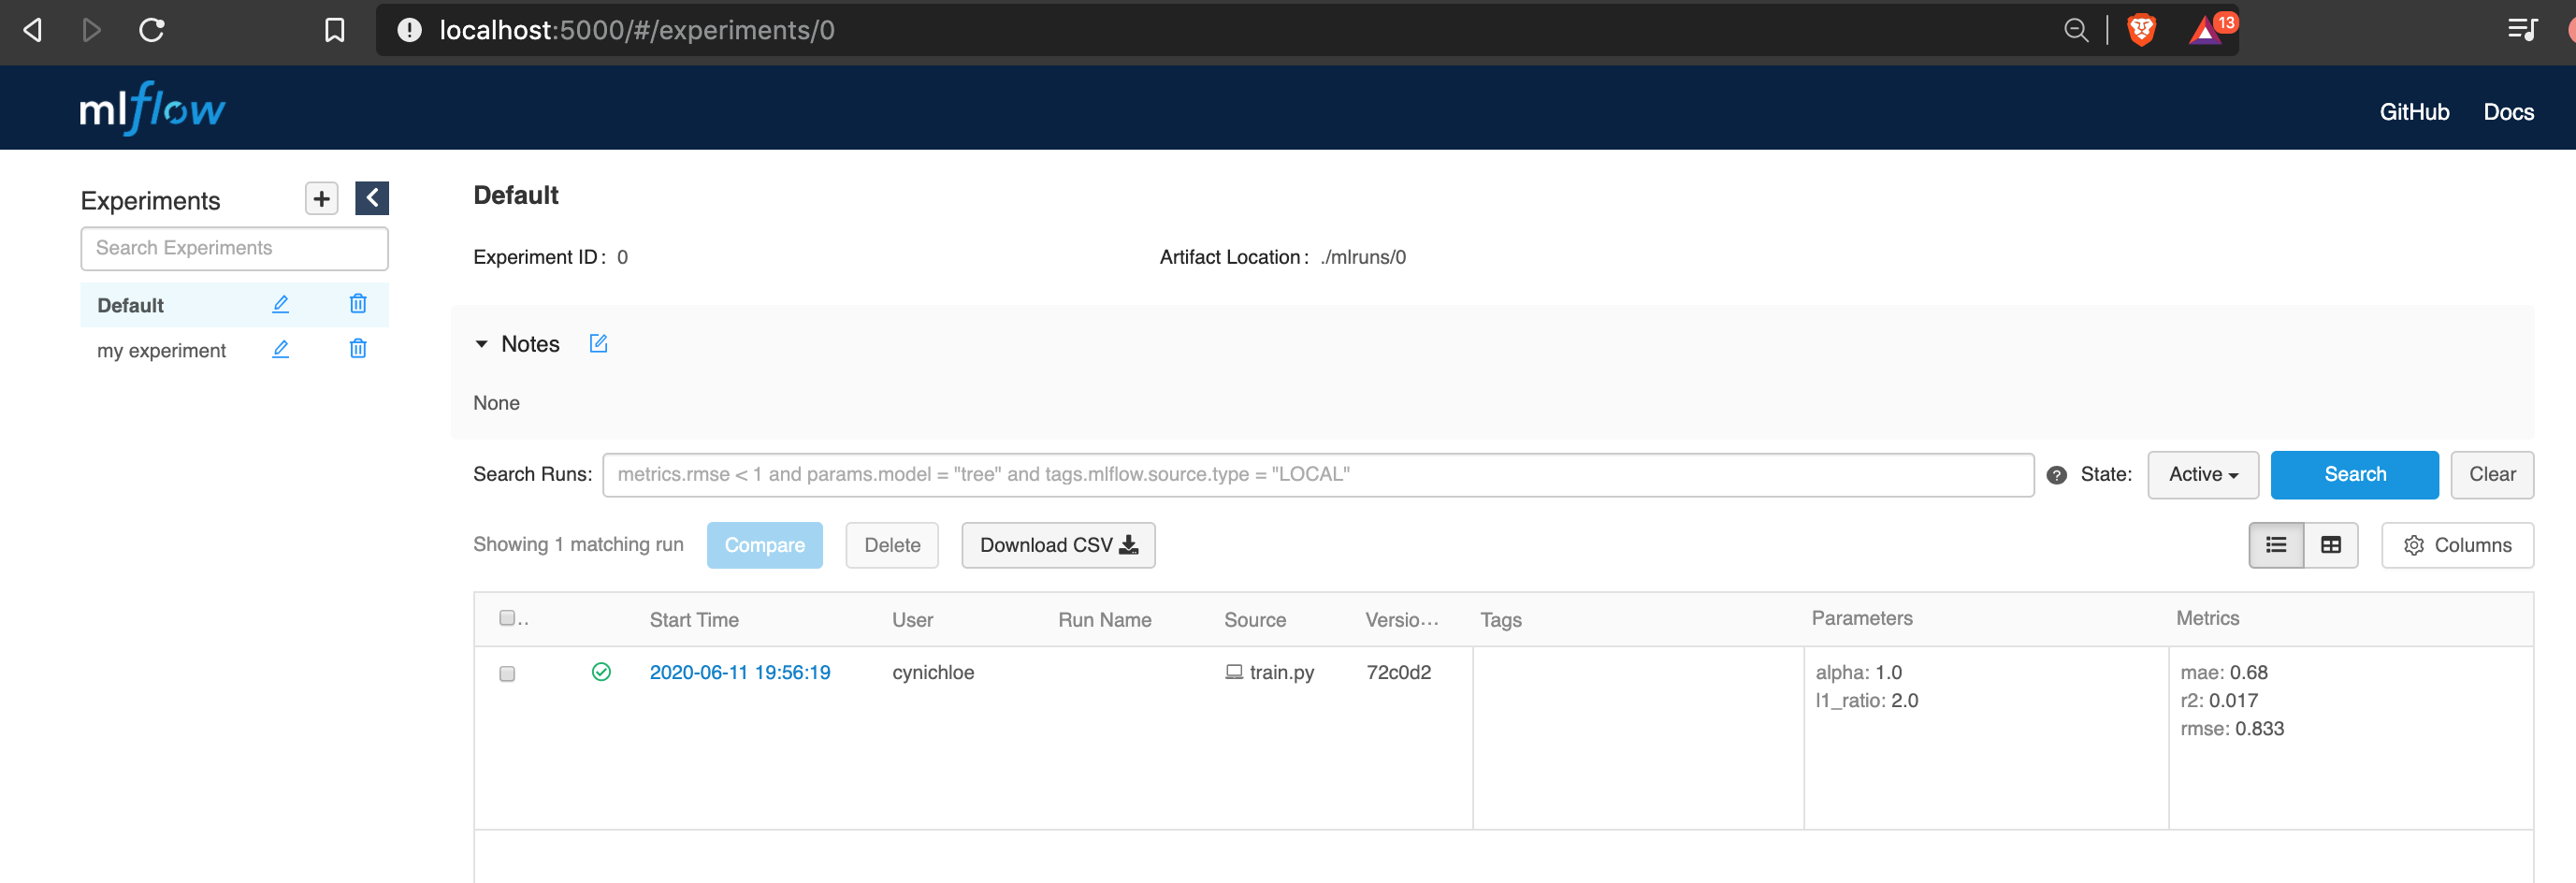

In [5]:
Image("run_default.png")

# how to actually add the metrics and params and models to track

https://www.mlflow.org/docs/latest/tracking.html

with mlflow.start_run():
    mlflow.log_param("param1", param1)
    mlflow.log_param("param2", param2)
    mlflow.log_metric("metric1", metric1)
    mlflow.log_metric("metric2", metric2)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model registry does not work with file store
    if tracking_url_type_store != "file":

        # Register the model
        # There are other ways to use the Model Registry, which depends on the use case,
        # please refer to the doc for more information:
        # https://mlflow.org/docs/latest/model-registry.html#api-workflow
        mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticnetWineModel")
    else:
        mlflow.sklearn.log_model(lr, "model")

# run a served model 

> mlflow run git@github.com:databricks/mlflow-example.git -P alpha=0

# querying the tracked programmatically 

In [2]:
import mlflow

In [3]:
from  mlflow.tracking import MlflowClient

# can track tracking uri hosted elsewhere as well
TRACKING_URI = 'http://localhost:5000/'

mlflow.set_tracking_uri(TRACKING_URI)
client = mlflow.tracking.MlflowClient(TRACKING_URI)
# returns a list of mlflow.entities.Experiment
experiments = client.list_experiments()

In [5]:
experiments

[<Experiment: artifact_location='./mlruns/0', experiment_id='0', lifecycle_stage='active', name='Default', tags={}>,
 <Experiment: artifact_location='file:///Users/cynichloe/Documents/mlflow/mlruns/3', experiment_id='3', lifecycle_stage='active', name='my experiment', tags={}>]

In [10]:
query1 = "metrics.r2 > 0 and metrics.rmse > 0.5"
runs = MlflowClient(TRACKING_URI).search_runs(experiment_ids=['12'], filter_string=query1, order_by=["metrics.r2 DESC"])

for i in runs:
    print(i)

<Run: data=<RunData: metrics={'mae': 0.5367302564993139,
 'r2': 0.32667221456046847,
 'rmse': 0.6980807807218317}, params={'alpha': '0.02', 'l1_ratio': '0.029'}, tags={'mlflow.log-model.history': '[{"run_id": "6f20b3a135c14427b40570a7eec375fc", '
                             '"artifact_path": "model", "utc_time_created": '
                             '"2020-06-17 15:34:52.126659", "flavors": '
                             '{"python_function": {"loader_module": '
                             '"mlflow.sklearn", "python_version": "3.7.0", '
                             '"data": "model.pkl", "env": "conda.yaml"}, '
                             '"sklearn": {"pickled_model": "model.pkl", '
                             '"sklearn_version": "0.23.1", '
                             '"serialization_format": "cloudpickle"}}}]',
 'mlflow.source.name': 'blackbox.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'cynichloe'}>, info=<RunInfo: artifact_uri='file:///Users/cynichloe/Documents/mlflow/

In [18]:
type(runs[0])

mlflow.entities.run.Run

In [15]:
import pandas as pd

In [33]:
ss = runs[0].data.to_dictionary()

In [29]:
df1 = pd.DataFrame(runs)

In [31]:
df1.head()[[0]]

,0
0,"(data, <RunData: metrics={'mae': 0.53673025649..."
1,"(data, <RunData: metrics={'mae': 0.53975805146..."
2,"(data, <RunData: metrics={'mae': 0.54141645220..."


In [28]:
ss

{'metrics': {'mae': 0.5367302564993139,
  'r2': 0.32667221456046847,
  'rmse': 0.6980807807218317},
 'params': {'l1_ratio': '0.029', 'alpha': '0.02'},
 'tags': {'mlflow.user': 'cynichloe',
  'mlflow.source.name': 'blackbox.py',
  'mlflow.log-model.history': '[{"run_id": "6f20b3a135c14427b40570a7eec375fc", "artifact_path": "model", "utc_time_created": "2020-06-17 15:34:52.126659", "flavors": {"python_function": {"loader_module": "mlflow.sklearn", "python_version": "3.7.0", "data": "model.pkl", "env": "conda.yaml"}, "sklearn": {"pickled_model": "model.pkl", "sklearn_version": "0.23.1", "serialization_format": "cloudpickle"}}}]',
  'mlflow.source.type': 'LOCAL'}}

In [25]:
df = pd.DataFrame(ss)

In [27]:
df.head(1000)

,metrics,params,tags
alpha,NaN,0.02,NaN
l1_ratio,NaN,0.029,NaN
mae,0.536730,NaN,NaN
mlflow.log-model.history,NaN,NaN,"[{""run_id"": ""6f20b3a135c14427b40570a7eec375fc""..."
mlflow.source.name,NaN,NaN,blackbox.py
mlflow.source.type,NaN,NaN,LOCAL
mlflow.user,NaN,NaN,cynichloe
r2,0.326672,NaN,NaN
rmse,0.698081,NaN,NaN
